<a href="https://colab.research.google.com/github/danipequito/PqtoRep/blob/main/%5BAula02%5D_Definindo_o_problema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IA aplicada a saúde - Aula 02**
Nesta aula iremos baixar a base de dados que usaremos durante o semestre.

## **Definição do problema**
Utilizaremos a base de dados: *SRAG 2021 a 2023 - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19* que está disponível, publicamente, no seguinte endereço eletrônico:
https://opendatasus.saude.gov.br/dataset/srag-2021-a-2023

1. O objetivo do estudo é a criação de modelos de aprendizado de máquina para previsões, utilizando os algoritmos que estudaremos ao longo do semestre.
2. Para isso, realizaremos algumas tarefas:
 - **Análise exploratória** da base de dados: entendendo as informações disponíveis nos dados;
 - **Pré-processamento** da base de dados: preparando a base de dados para as tarefas de aprendizado de máquina;
 - **Construindo modelos** de aprendizado de máquina.

## O que precisamos saber sobre a base que será utilizada?
O Ministério da Saúde (MS), por meio da Secretaria de Vigilância em Saúde (SVS), desenvolve a vigilância da Síndrome Respiratória Aguda Grave (SRAG) no Brasil, desde a pandemia de Influenza A(H1N1)pdm09. A partir disso, a vigilância de SRAG foi implantada na rede de vigilância de Influenza e outros vírus respiratórios, que anteriormente atuava exclusivamente com a vigilância sentinela de Síndrome Gripal (SG).

Em 2020, a vigilância da COVID-19, a infecção humana causada pelo novo Coronavírus, que vem causando uma pandemia, foi incorporada na rede de vigilância da Influenza e outros vírus respiratórios.

Esta página tem como finalidade disponibilizar o legado dos bancos de dados (BD) epidemiológicos de SRAG, da rede de vigilância da Influenza e outros vírus respiratórios, desde o início da sua implantação (2009) até os dias atuais (2023), com a incorporação da vigilância da covid-19. Atualmente, o sistema oficial para o registro dos casos e óbitos por SRAG é o Sistema de Informação da Vigilância Epidemiológica da Gripe (SIVEP-Gripe).

O MS publicou o Guia de Vigilância Epidemiológica Emergência de Saúde Pública de Importância Nacional pela Doença pelo Coronavírus 2019 aonde estão disponíveis informações sobre definições de casos, critérios de confirmação e encerramento dos casos, dentre outros.

Ressaltamos que os dados da vigilância de SRAG no Brasil disponibilizados nesta página, estão sujeitos a alterações decorrentes da investigação, ou mesmo correções de erros de digitação, pelas equipes de vigilância epidemiológica que desenvolvem o serviço nas três esferas de gestão.

Esclarece-se que as bases de dados de SRAG disponibilizadas neste portal passam por tratamento que envolve a anonimização, em cumprimento a Lei 13.709/2018.

In [21]:
# importando os pacotes que serão utilizados
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# definindo o endereço eletrônico de onde serão coletados os dados
url = 'https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2023/INFLUD23-31-07-2023.csv'

In [3]:
# baixando a base de dados diretamete do endereço eletrônico
response = requests.get(url)

In [4]:
# testando se a base foi baixada
if response.status_code == 200:
    # Continue o processo
    pass
else:
    print("Falha ao baixar a base de dados.")

In [6]:
# lendo a base de dados
with open('Dados SRAG.csv', 'wb') as file:
    file.write(response.content)

In [7]:
# gerando o dataframe com a base de dados
dados = pd.read_csv('Dados SRAG.csv', sep=';')
dados.head()

<ipython-input-7-1a66266cb1c6>:2: DtypeWarning: Columns (15,61,62,63,91,93,120) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('Dados SRAG.csv', sep=';')


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,LOTE_2_COV,LOTE_REF,FNT_IN_COV,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT,OUT_TRAT,DT_TRT_COV
0,01/01/2023,1,01/01/2023,1,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260,FUNDACAO HEMOAM,...,210067,NaN,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,10/01/2023,2,06/01/2023,1,PR,10RS CASCAVEL,1364.0,CASCAVEL,410480,HOSPITAL POLICLINICA CASCAVEL,...,214VCD081Z,FH4751,2,28/03/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,21OVCD309W,2.0,NaN,NaN,NaN
2,24/01/2023,4,22/01/2023,4,DF,NaN,NaN,BRASILIA,530010,HOSPITAL MATERNO INFANTIL DR ANTONIO LISBOA,...,FN5988,NaN,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,17/01/2023,3,15/01/2023,3,SP,GVE XV BAURU,1340.0,JAU,352530,HOSPITAL UNIMED REGIONAL JAU,...,210037,210546,2,26/05/2022,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,210546,9.0,NaN,NaN,NaN
4,01/02/2023,5,29/01/2023,5,PR,17RS LONDRINA,1371.0,ROLANDIA,412240,HOSPITAL SAO RAFAEL,...,ABX0530,FL1940,2,04/05/2022,88 - COVID-19 JANSSEN - AD26.COV2.S,207H21A,NaN,NaN,NaN,NaN


In [9]:
# quais são as dimensões do dataframe?
linhas = dados.shape[0]
colunas = dados.shape[1]
print('Os dados contém {} pacientes e {} variáveis'.format(linhas, colunas))

Os dados contém 178431 pacientes e 173 variáveis


In [12]:
# obtendo informações sobre os dados
print(dados.info)

<bound method DataFrame.info of         DT_NOTIFIC  SEM_NOT  DT_SIN_PRI  SEM_PRI SG_UF_NOT  \
0       01/01/2023        1  01/01/2023        1        AM   
1       10/01/2023        2  06/01/2023        1        PR   
2       24/01/2023        4  22/01/2023        4        DF   
3       17/01/2023        3  15/01/2023        3        SP   
4       01/02/2023        5  29/01/2023        5        PR   
...            ...      ...         ...      ...       ...   
178426  19/07/2023       29  16/07/2023       29        MS   
178427  20/07/2023       29  06/07/2023       27        MS   
178428  19/07/2023       29  17/07/2023       29        BA   
178429  03/07/2023       27  27/06/2023       26        MA   
178430  03/07/2023       27  25/06/2023       26        PA   

                               ID_REGIONA  CO_REGIONA            ID_MUNICIP  \
0           ENTORNO DE MANAUS E RIO NEGRO      5584.0                MANAUS   
1                           10RS CASCAVEL      1364.0            

In [15]:
# verificando os tipos de dados
dados.dtypes

DT_NOTIFIC     object
SEM_NOT         int64
DT_SIN_PRI     object
SEM_PRI         int64
SG_UF_NOT      object
               ...   
LOTE_REF2      object
TRAT_COV      float64
TIPO_TRAT     float64
OUT_TRAT       object
DT_TRT_COV    float64
Length: 173, dtype: object

In [16]:
# verificando as colunas do dataframe
dados.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
       'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT', 'ID_UNIDADE',
       ...
       'LOTE_2_COV', 'LOTE_REF', 'FNT_IN_COV', 'DOSE_2REF', 'FAB_COVRF2',
       'LOTE_REF2', 'TRAT_COV', 'TIPO_TRAT', 'OUT_TRAT', 'DT_TRT_COV'],
      dtype='object', length=173)

In [18]:
# Lista de todas as colunas
colunas = dados.columns.tolist()

# Dividir a lista de colunas em grupos para melhor visualização
num_colunas_por_grupo = 10  # Número de colunas por grupo
grupos_de_colunas = [colunas[i:i + num_colunas_por_grupo] for i in range(0, len(colunas), num_colunas_por_grupo)]

# Imprimir as colunas por grupo
for grupo in grupos_de_colunas:
    print(grupo)

['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT', 'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT', 'ID_UNIDADE']
['CO_UNI_NOT', 'CS_SEXO', 'DT_NASC', 'NU_IDADE_N', 'TP_IDADE', 'COD_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ID_PAIS']
['CO_PAIS', 'SG_UF', 'ID_RG_RESI', 'CO_RG_RESI', 'ID_MN_RESI', 'CO_MUN_RES', 'CS_ZONA', 'SURTO_SG', 'NOSOCOMIAL', 'AVE_SUINO']
['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'OUTRO_DES']
['PUERPERA', 'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI']
['IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OBES_IMC', 'OUT_MORBI', 'MORB_DESC', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE']
['M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'ANTIVIRAL', 'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'HOSPITAL', 'DT_INTERNA']
['SG_UF_INTE', 'ID_RG_INTE', 'CO_RG_INTE', 'ID_MN_INTE', 'CO_MU_INTE', 'UTI', 'DT_ENTUTI', 'DT_SAIDUTI', 'SUP

## Vamos gerar um histograma
Histograma é uma forma de visualizar a distribuição de frequências de uma variável numérica. Auxilia a identificar padrões, tendências e características da distribuição.
No eixo horizontal estão os intervalos (neste caso, intervalos de idade) e no eixo vertical estão as contagens (frequências).

(array([2.2291e+04, 5.7014e+04, 1.9503e+04, 2.7620e+03, 2.8000e+03,
        3.4210e+03, 3.4430e+03, 4.6660e+03, 4.3180e+03, 5.5010e+03,
        8.7700e+03, 9.5670e+03, 1.1621e+04, 1.0034e+04, 7.9680e+03,
        4.1480e+03, 5.3600e+02, 6.0000e+01, 5.0000e+00, 3.0000e+00]),
 array([ -5. ,   1.4,   7.8,  14.2,  20.6,  27. ,  33.4,  39.8,  46.2,
         52.6,  59. ,  65.4,  71.8,  78.2,  84.6,  91. ,  97.4, 103.8,
        110.2, 116.6, 123. ]),
 <BarContainer object of 20 artists>)

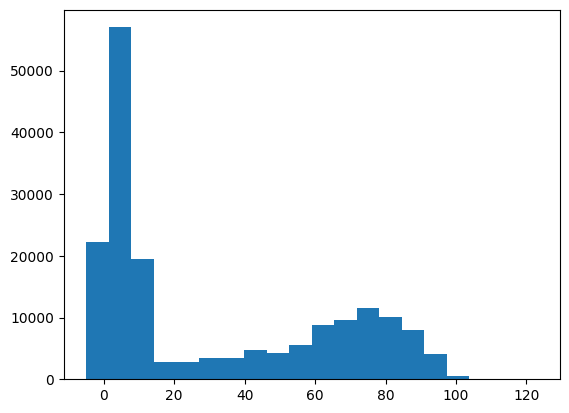

In [29]:
# visualizando alguns dados
plt.hist(dados['NU_IDADE_N'], bins=20)

Esta base de dados contém a variável 'EVOLUÇÃO'. Esta variável indica o desfecho da infecção por SRAG, ou seja, se o paciente foi **curado** ou foi a **óbito**. **Temos aí duas classes possíveis: cura e óbito.**
Vamos visualizar como estas classes estão distribuídas.
Prestem atenção nas categorias:
1 = CURA
2 = ÓBITO
9 = IGNORADO
3 = ÓBITO POR OUTRAS CAUSAS

In [31]:
dados['EVOLUCAO'].value_counts()

1.0    123995
2.0     13811
9.0      4652
3.0      4033
Name: EVOLUCAO, dtype: int64

<Axes: >

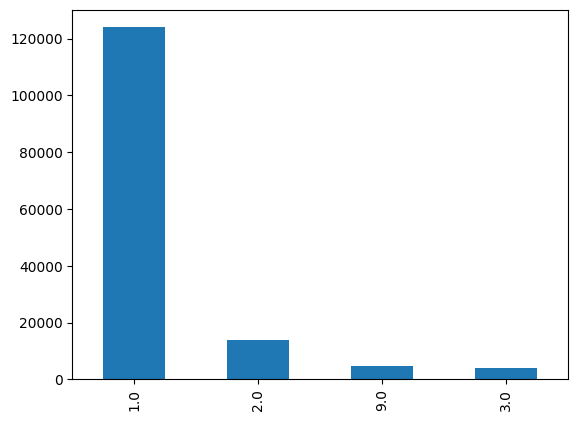

In [32]:
dados['EVOLUCAO'].value_counts().plot(kind='bar')